## Get Data

Get the data and prepare for prophet

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PATH_DATA = '../data/'

### Import Data

In [3]:
df_all = pd.read_csv(PATH_DATA + 'daily-min-temperatures.csv')

In [4]:
df_all.shape

(3650, 2)

In [5]:
df_all.sample(10)

,Date,Temp
2956,1989-02-06,13.2
2986,1989-03-08,20.3
3461,1990-06-26,5.2
1469,1985-01-10,13.7
2191,1987-01-02,13.8
1984,1986-06-09,9.6
369,1982-01-05,13.0
3547,1990-09-20,16.3
381,1982-01-17,24.0
2518,1987-11-25,9.9


### Prepare the data

check data types, spliting the data, and other preparation

In [6]:
## change to date types
print('Previous Types :\n', df_all.dtypes)
df_all['Date'] = pd.to_datetime(df_all['Date'])

print('-'*10)
print('After changes Types :\n', df_all.dtypes)

Previous Types :
 Date     object
Temp    float64
dtype: object
----------
After changes Types :
 Date    datetime64[ns]
Temp           float64
dtype: object


In [7]:
## make sure the data is sorted by time
df_all = df_all.sort_values('Date')
df_all.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [8]:
## Split data

## just use 3 latest years
used_data = df_all[df_all['Date']>='1987-01-01']

train_data = used_data[used_data['Date']<='1989-12-31']
test_data = used_data[used_data['Date']>'1989-12-31']

print('Number of Train :', train_data.shape[0])
print('Number of Train :', test_data.shape[0])

## save train test
train_data.to_csv(PATH_DATA + 'ts_train.csv', index = False)
test_data.to_csv(PATH_DATA + 'ts_test.csv', index = False)

Number of Train : 1095
Number of Train : 365


### Visualize the data

In [9]:
## make the time column as index --> visualization purposes
train_data_viz = train_data.set_index('Date')
test_data_viz = test_data.set_index('Date')
train_data_viz.head()

,Temp
Date,
1987-01-01,12.3
1987-01-02,13.8
1987-01-03,15.3
1987-01-04,15.6
1987-01-05,16.2


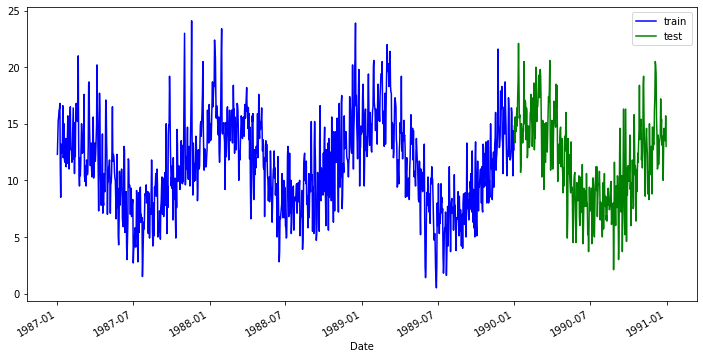

In [10]:
## Visualize the data

train_data_viz['Temp'].plot(figsize = (12,6), color='b')
test_data_viz['Temp'].plot(figsize = (12,6), color='g')
plt.legend(['train','test'])